# DATA SCIENCE LAB ASSINGMENT0-2
## _ABHISHEK_SUTAR

## 2) Data Wrangling II

## Create an “Academic performance” dataset of students and perform the following operations using Python.


1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [1]:
#Importing the libraries and reading the data file

import numpy as np
import pandas as pd


df= pd.read_csv("/home/admin1/Downloads/marks.csv")
print(df)

    Rollno   Phy   Chem  Math   Bio
0      1.0   4.0    4.0  53.0   2.0
1      2.0   5.0   23.0   5.0   3.0
2      3.0   2.0    6.0   1.0   1.0
3      4.0   6.0    2.0   5.0   6.0
4      5.0   8.0    1.0   7.0   8.0
5      6.0  20.0    8.0   3.0   NaN
6      7.0   7.0   55.0   2.0   2.0
7      8.0   NaN    5.0   8.0   NaN
8      9.0   3.0  213.0   5.0   5.0
9     10.0   8.0    5.0  10.0   6.0
10    11.0   2.0    3.0  34.0  43.0
11    12.0   7.0    8.0   3.0   7.0
12    13.0   5.0    3.0   2.0   9.0
13    14.0   NaN    0.0   7.0   3.0
14    15.0   0.0    1.0   9.0   6.0
15     NaN   NaN    NaN   NaN   NaN


In [2]:
df.describe()

,Rollno,Phy,Chem,Math,Bio
count,15.000000,13.000000,15.000000,15.000000,13.000000
mean,8.000000,5.923077,22.466667,10.266667,7.769231
std,4.472136,4.906824,54.514568,14.215016,10.871629
min,1.000000,0.000000,0.000000,1.000000,1.000000
25%,4.500000,3.000000,2.500000,3.000000,3.000000
50%,8.000000,5.000000,5.000000,5.000000,6.000000
75%,11.500000,7.000000,8.000000,8.500000,7.000000
max,15.000000,20.000000,213.000000,53.000000,43.000000


In [3]:
df.isnull()

,Rollno,Phy,Chem,Math,Bio
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,True
6,False,False,False,False,False
7,False,True,False,False,True
8,False,False,False,False,False
9,False,False,False,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rollno  15 non-null     float64
 1   Phy     13 non-null     float64
 2   Chem    15 non-null     float64
 3   Math    15 non-null     float64
 4   Bio     13 non-null     float64
dtypes: float64(5)
memory usage: 768.0 bytes


In [5]:
#Dealing with Missing Values

#Taking the mean and printing it
mean_phy=df['Phy'].mean()
print(mean_phy)

5.923076923076923


In [6]:
#Replacing the missing values in Phy column with the mean

df['Phy'].fillna(value=mean_phy, inplace=True)
print(df)

    Rollno        Phy   Chem  Math   Bio
0      1.0   4.000000    4.0  53.0   2.0
1      2.0   5.000000   23.0   5.0   3.0
2      3.0   2.000000    6.0   1.0   1.0
3      4.0   6.000000    2.0   5.0   6.0
4      5.0   8.000000    1.0   7.0   8.0
5      6.0  20.000000    8.0   3.0   NaN
6      7.0   7.000000   55.0   2.0   2.0
7      8.0   5.923077    5.0   8.0   NaN
8      9.0   3.000000  213.0   5.0   5.0
9     10.0   8.000000    5.0  10.0   6.0
10    11.0   2.000000    3.0  34.0  43.0
11    12.0   7.000000    8.0   3.0   7.0
12    13.0   5.000000    3.0   2.0   9.0
13    14.0   5.923077    0.0   7.0   3.0
14    15.0   0.000000    1.0   9.0   6.0
15     NaN   5.923077    NaN   NaN   NaN


/home/admin1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Phy', ylabel='Density'>

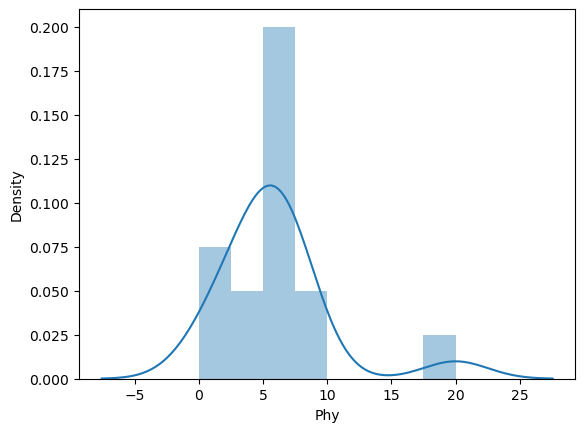

In [7]:
#Dealing with Outliers

#Outliers Detection
import seaborn as sn
import matplotlib.pyplot as plt

#Distribution Plot of Physics Column
sn.distplot(df['Phy'])

<AxesSubplot:ylabel='Phy'>

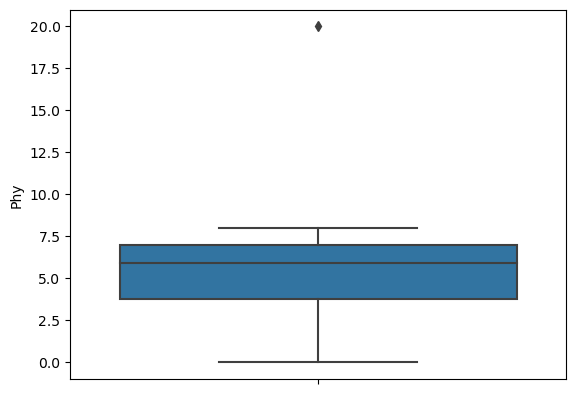

In [8]:
#Box Plot of Physics Column(the outliers are vissible here at 20)

sn.boxplot(y='Phy', data=df)

In [9]:
#Taking the mean of the Physics Column

df['Phy'].mean()

5.9230769230769225

In [10]:
#Removing the outliers (marks above 10)

dfp=df[df['Phy']<10]

<AxesSubplot:ylabel='Phy'>

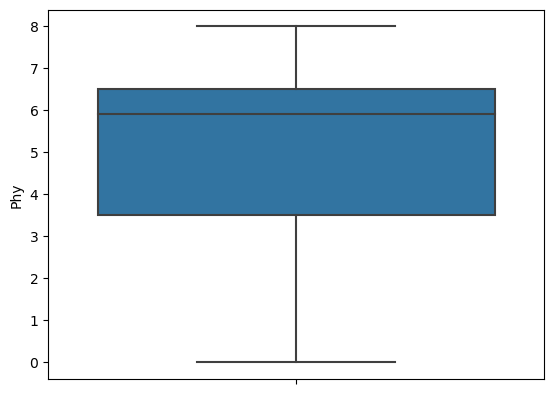

In [11]:
#Box Plot of new Physics Column (without outliers)

sn.boxplot(y='Phy', data=dfp)

In [12]:
#New Mean

dfp['Phy'].mean()

4.984615384615384

In [13]:
#Answer with treated Physics Column (No missing as well as outlier data)

print(dfp)

    Rollno       Phy   Chem  Math   Bio
0      1.0  4.000000    4.0  53.0   2.0
1      2.0  5.000000   23.0   5.0   3.0
2      3.0  2.000000    6.0   1.0   1.0
3      4.0  6.000000    2.0   5.0   6.0
4      5.0  8.000000    1.0   7.0   8.0
6      7.0  7.000000   55.0   2.0   2.0
7      8.0  5.923077    5.0   8.0   NaN
8      9.0  3.000000  213.0   5.0   5.0
9     10.0  8.000000    5.0  10.0   6.0
10    11.0  2.000000    3.0  34.0  43.0
11    12.0  7.000000    8.0   3.0   7.0
12    13.0  5.000000    3.0   2.0   9.0
13    14.0  5.923077    0.0   7.0   3.0
14    15.0  0.000000    1.0   9.0   6.0
15     NaN  5.923077    NaN   NaN   NaN


In [16]:
# dealing with chem column
mean_Bio=df['Bio'].mean()
print(mean_Bio)

7.769230769230769


In [17]:
#Replacing the missing values in Bio column with the mean

dfp['Bio'].fillna(value=mean_Bio, inplace=True)
print(dfp)

    Rollno       Phy   Chem  Math        Bio
0      1.0  4.000000    4.0  53.0   2.000000
1      2.0  5.000000   23.0   5.0   3.000000
2      3.0  2.000000    6.0   1.0   1.000000
3      4.0  6.000000    2.0   5.0   6.000000
4      5.0  8.000000    1.0   7.0   8.000000
6      7.0  7.000000   55.0   2.0   2.000000
7      8.0  5.923077    5.0   8.0   7.769231
8      9.0  3.000000  213.0   5.0   5.000000
9     10.0  8.000000    5.0  10.0   6.000000
10    11.0  2.000000    3.0  34.0  43.000000
11    12.0  7.000000    8.0   3.0   7.000000
12    13.0  5.000000    3.0   2.0   9.000000
13    14.0  5.923077    0.0   7.0   3.000000
14    15.0  0.000000    1.0   9.0   6.000000
15     NaN  5.923077    NaN   NaN   7.769231


/home/admin1/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
#Dealing with Outliers

#Outliers Detection
import seaborn as sn
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Bio'>

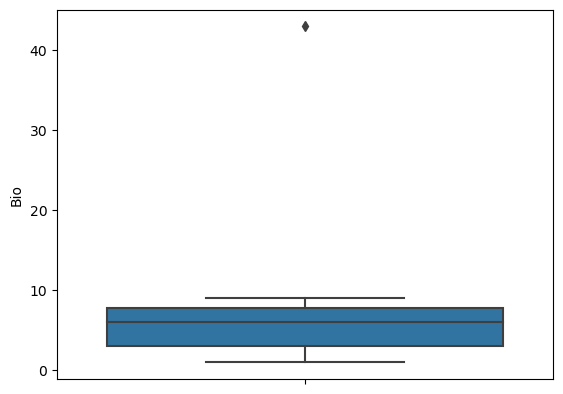

In [19]:
#Box Plot of Biology Column(the outliers are vissible here at 43)

sn.boxplot(y='Bio', data=dfp)

In [20]:

#Taking the mean of the Biology Column

dfp['Bio'].mean()

7.76923076923077

In [21]:
#Removing the outliers (marks above 43)

dfpb=dfp[dfp['Bio']<43]

<AxesSubplot:ylabel='Bio'>

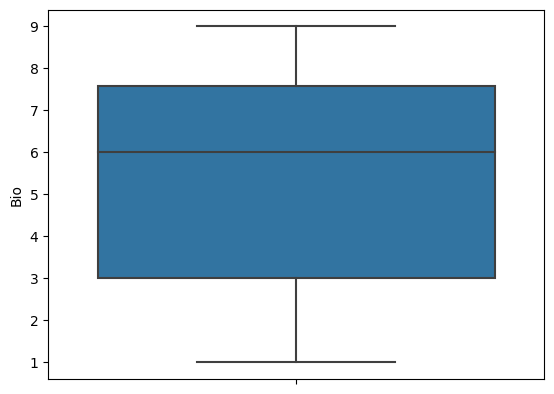

In [22]:
#Box Plot of new Biology Column (without outliers)

sn.boxplot(y='Bio', data=dfpb)

In [23]:
#New Mean

dfpb['Bio'].mean()

5.252747252747254

In [25]:
#Answer with treated Biology Column (No missing as well as outlier data)

print(dfpb)

    Rollno       Phy   Chem  Math       Bio
0      1.0  4.000000    4.0  53.0  2.000000
1      2.0  5.000000   23.0   5.0  3.000000
2      3.0  2.000000    6.0   1.0  1.000000
3      4.0  6.000000    2.0   5.0  6.000000
4      5.0  8.000000    1.0   7.0  8.000000
6      7.0  7.000000   55.0   2.0  2.000000
7      8.0  5.923077    5.0   8.0  7.769231
8      9.0  3.000000  213.0   5.0  5.000000
9     10.0  8.000000    5.0  10.0  6.000000
11    12.0  7.000000    8.0   3.0  7.000000
12    13.0  5.000000    3.0   2.0  9.000000
13    14.0  5.923077    0.0   7.0  3.000000
14    15.0  0.000000    1.0   9.0  6.000000
15     NaN  5.923077    NaN   NaN  7.769231
